In [1]:
import pandas as pd
import numpy as np


In [2]:
train_dataset = pd.read_csv("Google_Stock_Price_Train.csv")
df_value = train_dataset['Open'].values
df_value = np.reshape(df_value,(-1,1))
df_value

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
scaled_train = sc.fit_transform(df_value)

In [4]:
scaled_train

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [5]:
x_train =  []
y_train  = []

for i in range(60,1258):
    x_train.append(scaled_train[i-60:i,0])
    y_train.append(scaled_train[i,0])

x_train , y_train = np.array(x_train) , np.array(y_train)

In [6]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [10]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense



regression = Sequential()
regression.add(LSTM(units=50,return_sequences = True, input_shape=(x_train.shape[1],1)))
regression.add(Dropout(0.2))

regression.add(LSTM(units=50,return_sequences = True))
regression.add(Dropout(0.2))

regression.add(LSTM(units=50,return_sequences = True))
regression.add(Dropout(0.2))

regression.add(LSTM(units=50))
regression.add(Dropout(0.2))
    
regression.add(Dense(units=1))


C:\Users\thang\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
regression.compile(optimizer='adam',loss='mean_squared_error')

In [14]:
regression.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0370
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0075
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0056
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0051
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0057
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0053
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0050
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0051
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0044
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0050
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0038
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0043
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0039
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0038
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - lo

In [22]:
test_dataset = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock = test_dataset.iloc[:,1:2].values
real_stock

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [34]:
total = pd.concat([train_dataset['Open'],test_dataset['Open']],axis=0)

In [66]:
input = total[len(total) - len(test_dataset) - 60:].values

In [68]:
input = np.reshape(input,(-1,1))

In [82]:
len(real_stock)

20

In [72]:
input = sc.transform(input)
input

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [74]:
x_test = []


for i in range(60,80):
    x_test.append(input[i-60:i,0])
    

x_test = np.array(x_test)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [76]:
pred = regression.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [78]:
pred = sc.inverse_transform(pred)
pred

array([[779.22125],
       [776.61633],
       [777.0455 ],
       [778.5096 ],
       [781.8717 ],
       [787.7565 ],
       [793.0772 ],
       [795.20337],
       [795.5492 ],
       [795.3181 ],
       [795.0118 ],
       [794.60846],
       [794.2546 ],
       [794.6387 ],
       [795.4877 ],
       [800.0915 ],
       [806.958  ],
       [814.2693 ],
       [818.12854],
       [813.829  ]], dtype=float32)

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Real stocks vs predicted')

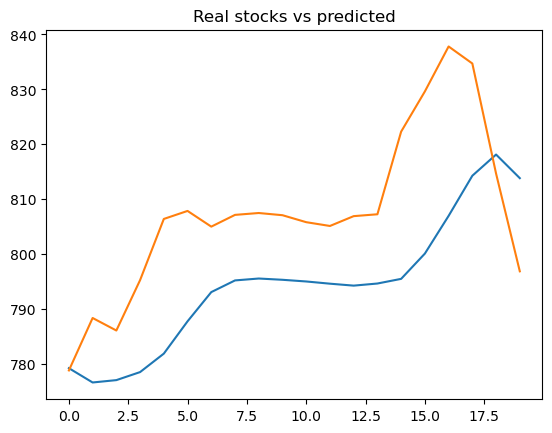

In [90]:
plt.plot(pred)
plt.plot(real_stock)
plt.title("Real stocks vs predicted")

In [92]:
real_stock

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])